# Carregamento do Dataset

Para começarmos os tratamentos de dados, primeiro vamos fazer uma análise sobre o data set. Para isso precisamos carrega-lo.

In [1]:
from DataLoader.DataLoading import DataLoader

#Carregando o dataset
dataLoader = DataLoader('./Datasets/heart_failure_clinical_records_dataset.csv')
dataset = dataLoader.load_data()

Dataset carregado com sucesso!


# Exploração dos Dados (EDA)

Agora que ja carregamos o dataset, vamos fazer as primeiras análises básicas para entender como os dados são organizados, podendo ver tambem os seus tipos.

In [2]:
from DataEngineering.DataExplorer import DataExplorer

#Análise inicial
data_explorer = DataExplorer(dataset)
data_explorer.analyze()

Primeiras linhas do dataset:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0 

In [3]:
from DataEngineering.DataTypeValidator import DataTypeValidator

# Validação dos tipos de dados
data_type_validator = DataTypeValidator(dataset)
data_type_validator.validate_types()


Tipos de dados antes da validação:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Validação concluída.


# Identificar Outliers

### Visualização inicial - Histogramas

Faremos agora uma análise visual para melhor identificar outliers. Para isso plotaremos os histogramas para identificar se os dados seguem uma distribuição normal. Faremos isso somente para colunas numéricas.

Matplotlib is building the font cache; this may take a moment.


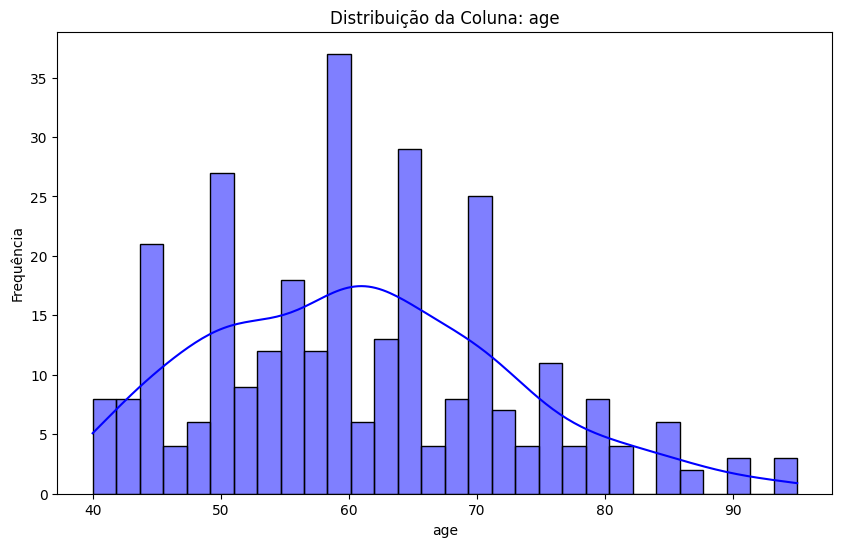

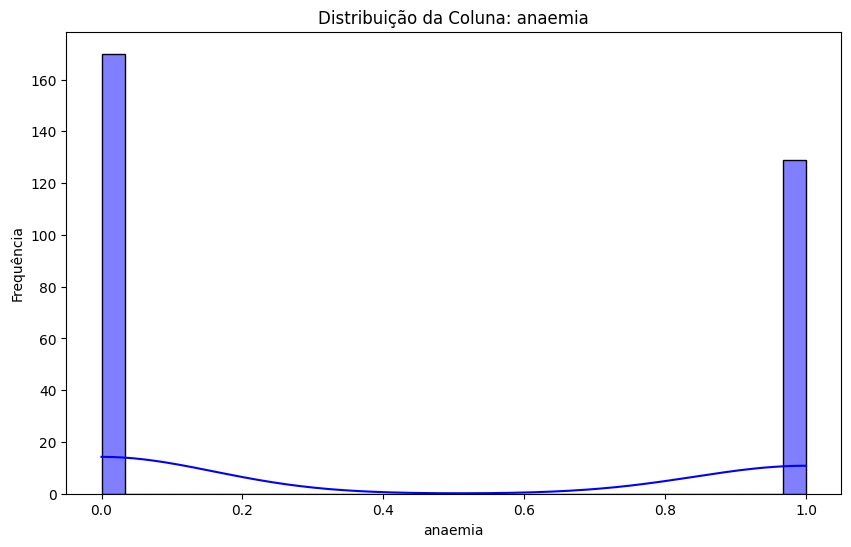

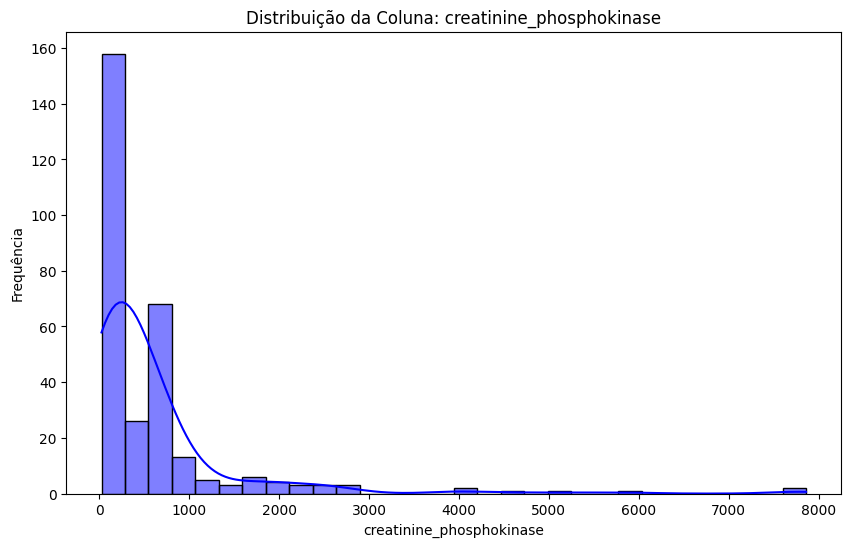

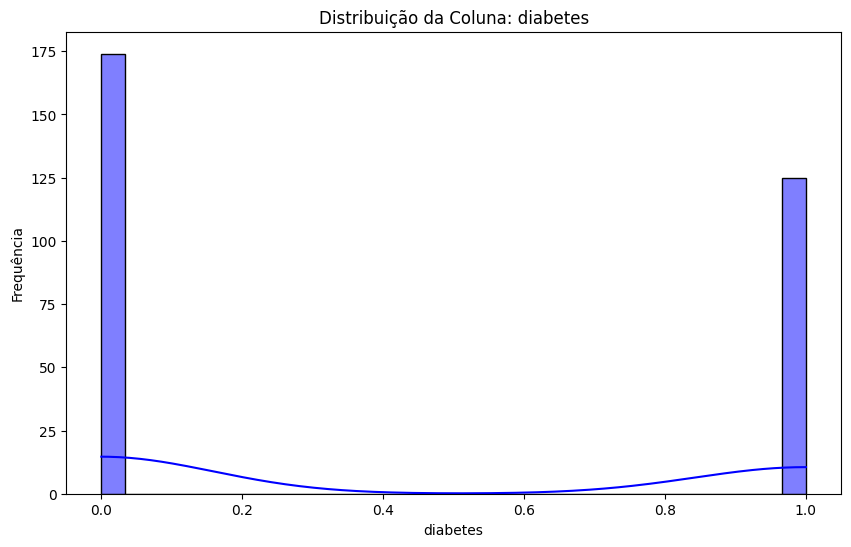

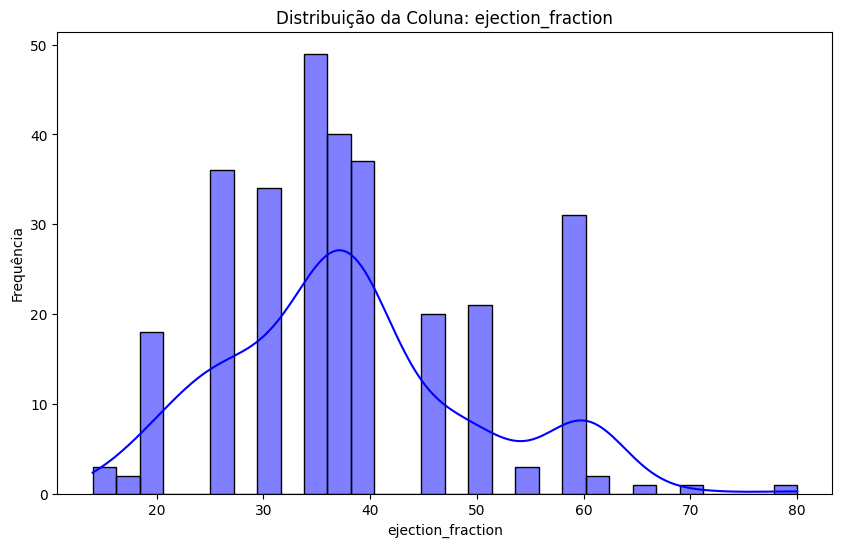

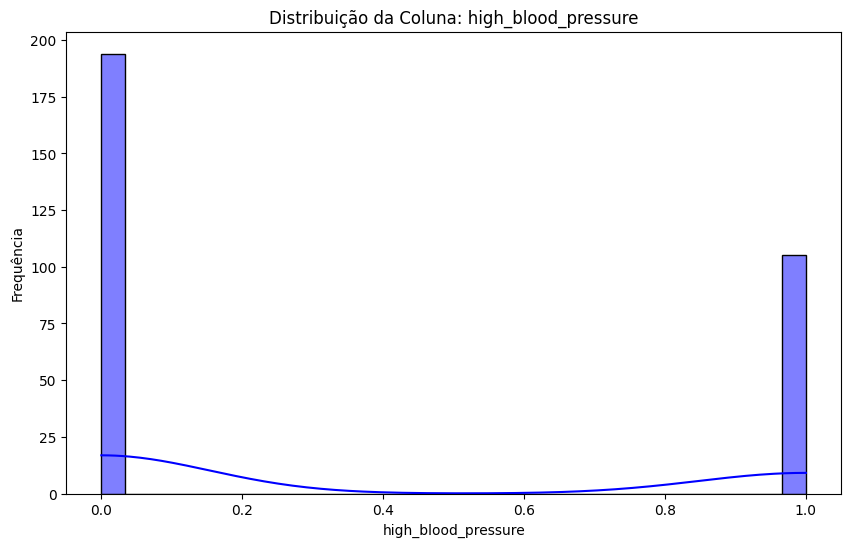

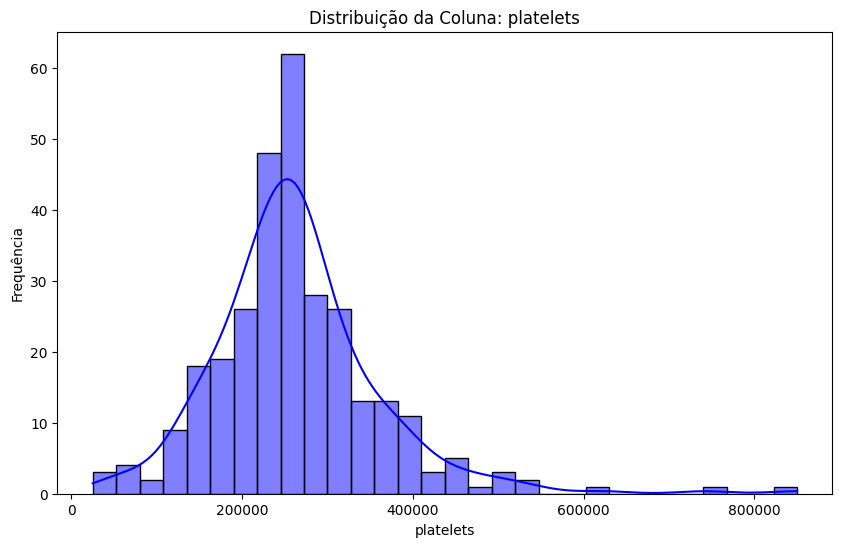

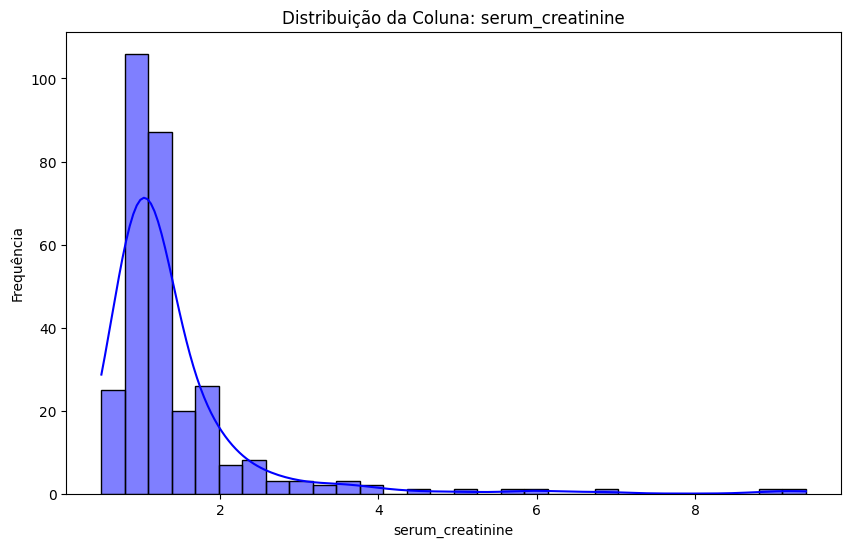

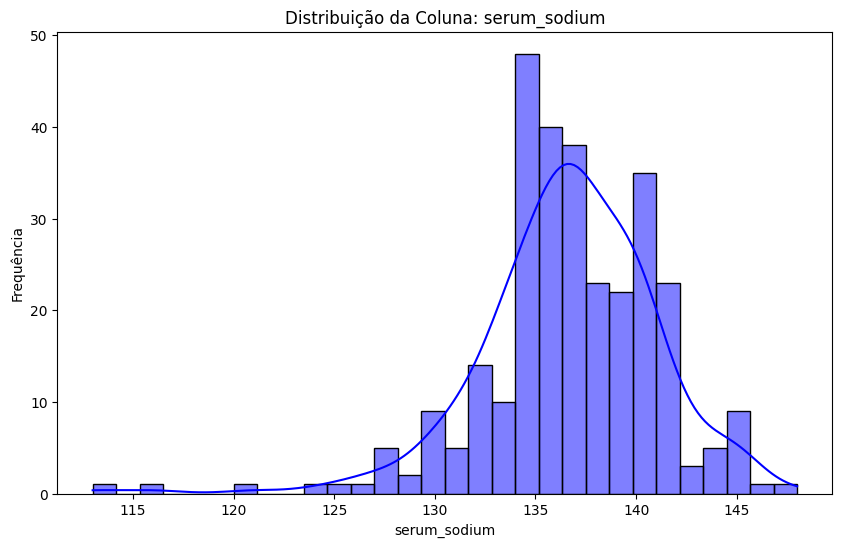

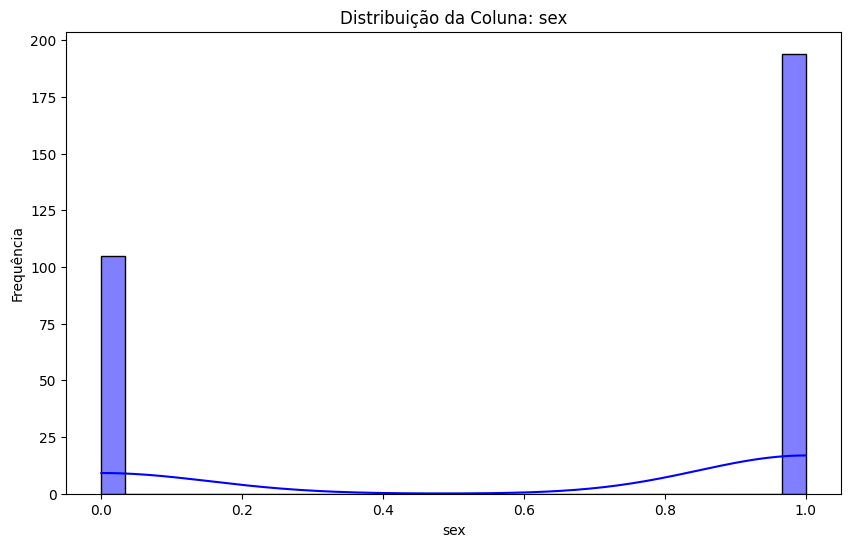

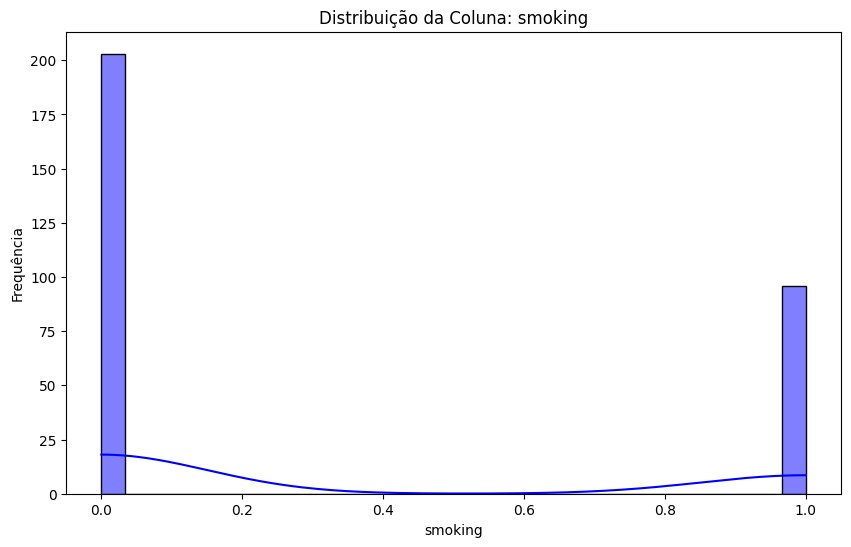

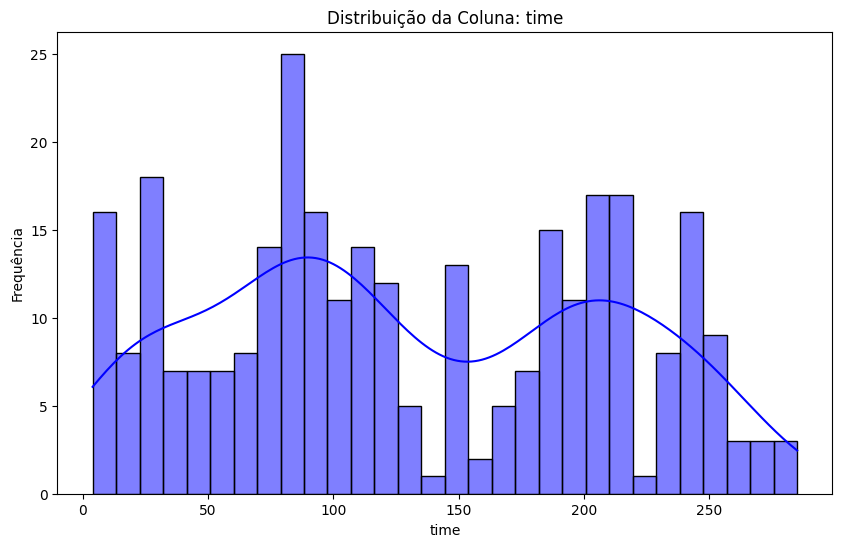

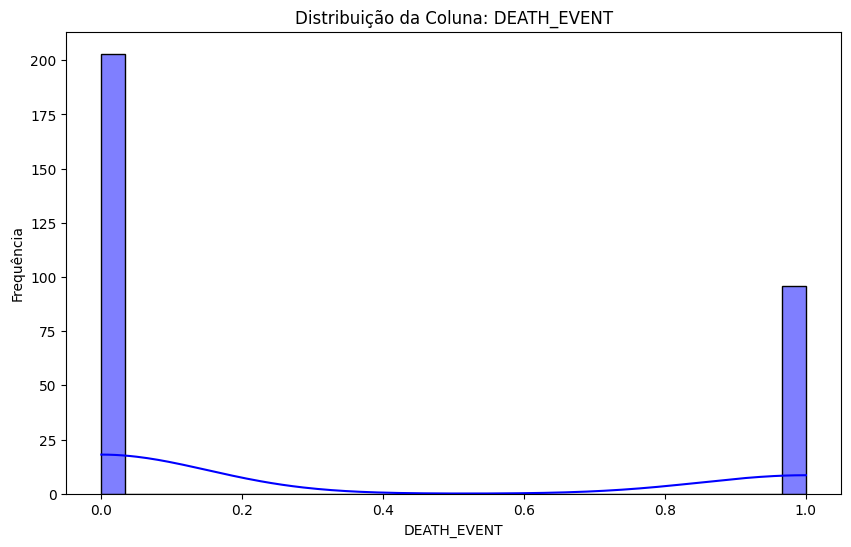

In [4]:
from DataEngineering.DataVisualizer import DataVisualizer

# Análise visual de distribuições e outliers
data_visualizer = DataVisualizer(dataset)
data_visualizer.plot_distributions()

### Identificação de Outliers

In [6]:
from DataEngineering.OutlierAnalyser import OutlierAnalyzer

outlier_analyzer = OutlierAnalyzer(dataset)

# Detectar outliers usando o método IQR
outliers_iqr = outlier_analyzer.detect_outliers_iqr()
print(f"Detecção de outlers por IQR")
# Exibir os índices de outliers para cada coluna
for column, indices in outliers_iqr.items():
    if indices:
        print(f"Coluna '{column}' possui {len(indices)} outliers: {indices}")

# Detectar outliers usando o método Z-Score
outliers_zscore = outlier_analyzer.detect_outliers_zscore()
print(f"Detecção de outlers por Z-Score")
# Exibir os índices de outliers para cada coluna
for column, indices in outliers_zscore.items():
    if indices:
        print(f"Coluna '{column}' possui {len(indices)} outliers: {indices}")


Detecção de outlers por IQR
Coluna 'creatinine_phosphokinase' possui 29 outliers: [1, 38, 46, 52, 60, 72, 103, 107, 130, 134, 139, 147, 149, 153, 163, 164, 171, 176, 187, 200, 208, 227, 246, 250, 280, 283, 295, 296, 297]
Coluna 'ejection_fraction' possui 2 outliers: [64, 217]
Coluna 'platelets' possui 21 outliers: [7, 15, 47, 55, 69, 105, 109, 117, 162, 163, 167, 200, 212, 224, 230, 240, 277, 279, 281, 287, 296]
Coluna 'serum_creatinine' possui 29 outliers: [4, 9, 10, 28, 31, 35, 38, 39, 48, 52, 54, 56, 61, 65, 82, 104, 117, 124, 129, 131, 150, 167, 183, 203, 217, 228, 247, 281, 282]
Coluna 'serum_sodium' possui 4 outliers: [4, 19, 126, 199]
Detecção de outlers por Z-Score
Coluna 'creatinine_phosphokinase' possui 7 outliers: [1, 52, 60, 72, 103, 134, 171]
Coluna 'ejection_fraction' possui 1 outliers: [64]
Coluna 'platelets' possui 3 outliers: [105, 109, 296]
Coluna 'serum_creatinine' possui 6 outliers: [9, 28, 52, 131, 217, 228]
Coluna 'serum_sodium' possui 3 outliers: [4, 19, 199]


Podemos então plotar boxPlot para as colunas listadas acima

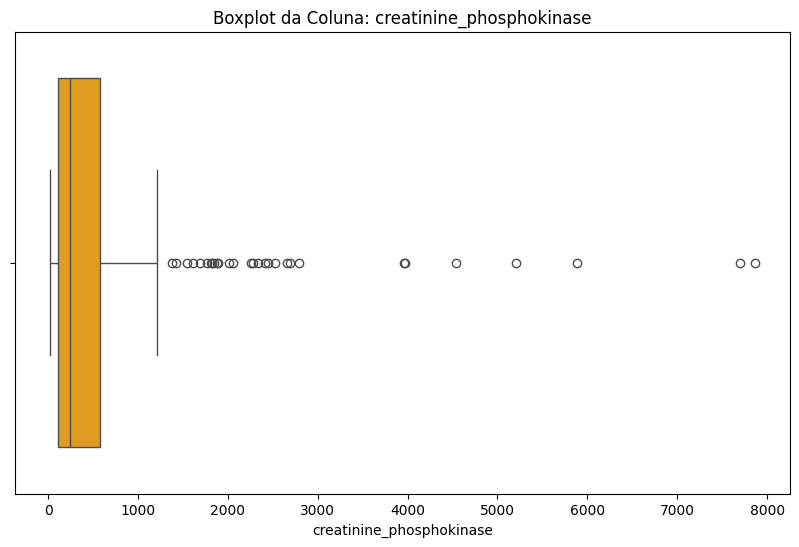

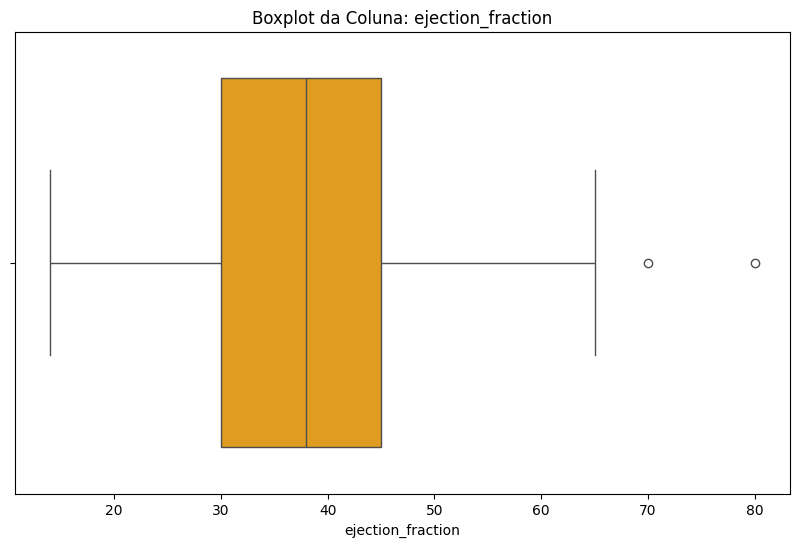

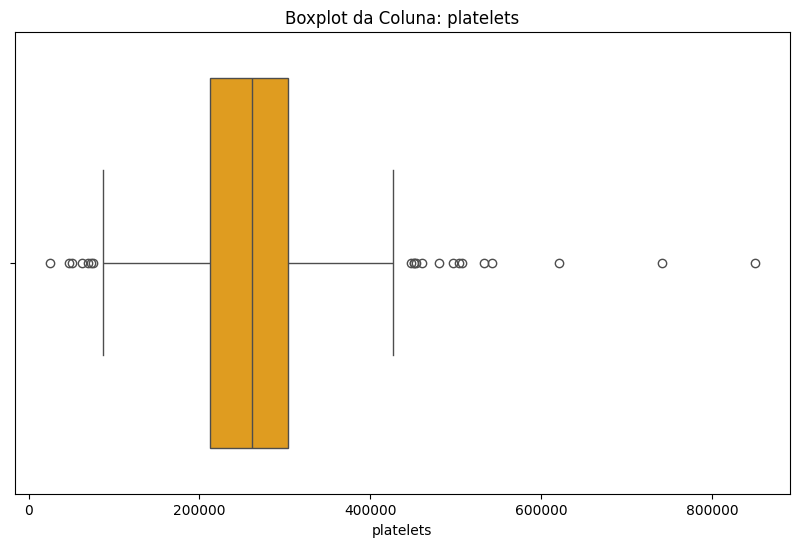

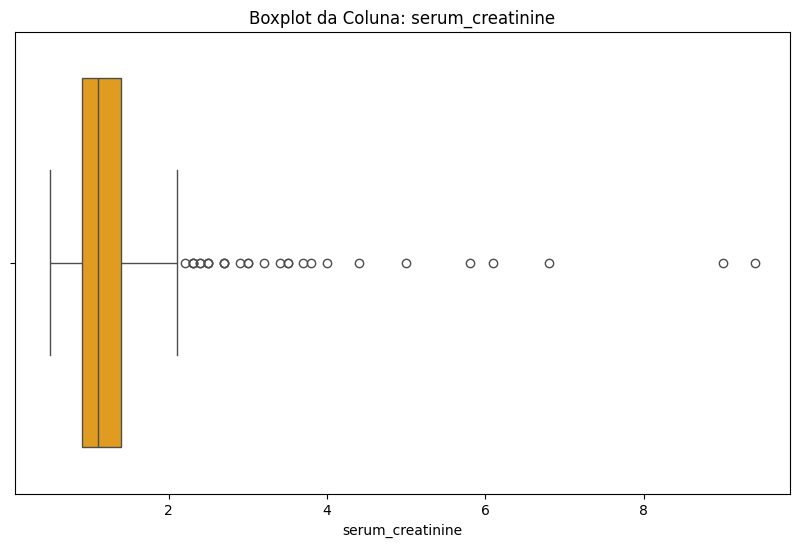

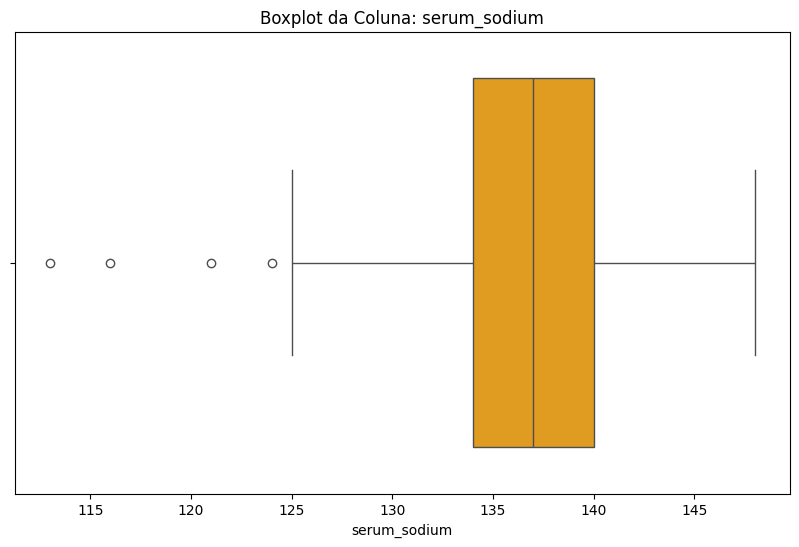

In [9]:
# Filtrar as colunas que possuem outliers detectados pelo Z-Score
columns_with_outliers = [column for column, indices in outliers_iqr.items() if indices]

# Plotar boxplots apenas para as colunas com outliers
data_visualizer.plot_boxplots(columns_with_outliers)


Porém, para o problema que se deseja solucionar, talvez esses nao sejam o melhor método para detectar outliers, visto que cada feature tem suas características e me dizem coisas diferentes.

In [4]:
# Detectando os outliers com base nos limites clínicos
from Dictionaries.features_limits import features_limits

outlier_results = {}
for column, (min_val, max_val) in features_limits.items():
    print(f"\nAnalisando outliers na coluna '{column}'...")
    outliers = outlier_analyzer.check_custom_limits(min_val, max_val, column)
    outlier_results[column] = outliers


Analisando outliers na coluna 'creatinine_phosphokinase'...
Coluna 'creatinine_phosphokinase' possui 141 outliers: [0, 1, 7, 12, 15, 17, 19, 24, 30, 31, 35, 37, 38, 40, 42, 44, 45, 46, 47, 48, 50, 52, 55, 57, 58, 59, 60, 61, 63, 64, 71, 72, 74, 79, 81, 91, 92, 96, 100, 101, 102, 103, 105, 106, 107, 108, 112, 114, 115, 119, 120, 123, 124, 125, 130, 131, 132, 134, 135, 137, 139, 140, 142, 144, 147, 148, 149, 151, 153, 154, 158, 162, 163, 164, 165, 168, 169, 170, 171, 176, 179, 180, 182, 186, 187, 190, 194, 195, 196, 198, 199, 200, 201, 208, 209, 211, 215, 216, 217, 218, 219, 220, 223, 224, 225, 227, 233, 234, 238, 241, 243, 244, 246, 248, 250, 251, 254, 256, 261, 264, 265, 266, 268, 269, 270, 271, 275, 276, 277, 278, 280, 281, 283, 287, 288, 289, 290, 291, 295, 296, 297]

Analisando outliers na coluna 'ejection_fraction'...
Coluna 'ejection_fraction' possui 187 outliers: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 28, 29, 30, 32, 33, 35, 38, 39, 40, 41, 

# Normalização e Padronização de variáveis


Nesta etapa vamos abordar algumas técnicas de normalizaçao ou padronização para validar qual se adequa melhor ao nosso propósito, pois alguns algorítimos de Machine Learning podem ser sensíveis a escala dos dados. A priori desejamos uma estratégia que preserve os outliers, pois eles podem ser indicativos para insuficiência cardíaca.

Para nossa estratégia vamos testar a normalizaçao e a padronização e testar em um modelo de Regressão Logística para comparar os resultados. Primeiro iremos separar o dataset.

In [2]:
from DataEngineering.DataScaler import DataScaler
from sklearn.linear_model import LogisticRegression

# Instanciar a classe DataScaler
data_scaler = DataScaler(dataset, 'DEATH_EVENT')

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = data_scaler.split_data()

### Normalização por MinMax Scaler

In [3]:
# Aplicar MinMax
X_train_normalized, X_test_normalized = data_scaler.scale_data(X_train, X_test, "minmax")

# Treinar modelo com dados do MinMax
model_normalized = LogisticRegression(random_state=42)
model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = model_normalized.predict(X_test_normalized)

### Normalização RobustScaler

In [4]:
# Aplicar padronização
X_train_standardized, X_test_standardized = data_scaler.scale_data(X_train, X_test, "robustscaler")

# Treinar modelo com dados padronizados
model_standardized = LogisticRegression(random_state=42)
model_standardized.fit(X_train_standardized, y_train)
y_pred_standardized = model_standardized.predict(X_test_standardized)

### Comparando modelos

In [5]:
# Avaliar dados do MinMax
data_scaler.evaluate_model(y_test, y_pred_normalized, "MinMax")
# Avaliar dados do RobustScaler
data_scaler.evaluate_model(y_test, y_pred_standardized, "RobustScaler")


Resultados para MinMax:
Acurácia: 0.72
Precisão: 0.90
Recall: 0.36
F1-Score: 0.51

Resultados para RobustScaler:
Acurácia: 0.80
Precisão: 0.93
Recall: 0.56
F1-Score: 0.70


Devido a não remoção dos outliers, pois eles nos ajudarão a identificar os dados de insuficiência cardíaca, o RobustScaler por usar a mediana e o IQR para escalonar os dados, ele se mostra mais eficiente do que o MinMax.